# Naive Analysis
In this section, we will begin a naive analysis to understand how the diversity of a movie's cast can potentially influence that movie's performance. Before diving into details, it's important to define what we mean by "naïve analysis" and explain our goal. A naive analysis is a simplified, exploratory approach to studying a phenomenon or a relationship between variables. The aim is to provide an initial understanding of the subject before undertaking more in-depth analyses.

In [100]:
# Useful Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import numpy as np

## Ethnic diversity
We will begin by studying ethnic diversity within a movie's cast, in order to understand how it can potentially influence that movie's performance.

### Dataframe
Let's download a DataFrame containing information about the movies, including their ethnic diversity score. We will then use the Pandas library in Python to display the first lines of the DataFrame and better understand its content and format.

In [101]:
# Load Datasets
ethnicity_diversity_df = pd.read_csv('generated/ethnicity_diversity.csv')

# Display ethnicity_diversity_df dataframe
display(ethnicity_diversity_df)

,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_genres,ethnicity_diversity,actors_count,rating_average,rating_count,movie_box_office_revenue
0,/m/031hcx,Harry Potter and the Order of the Phoenix,2007.0,22,"['Mystery', 'Family Film', 'Fantasy Adventure'...",0.744898,28,7.685,18416,7.263377
1,/m/02qr3k8,Terror in the Aisles,1984.0,22,"['Thriller', 'Horror', 'Documentary']",0.850480,27,6.100,37,-0.425137
2,/m/031786,Harry Potter and the Goblet of Fire,2005.0,32,"['Thriller', 'Science Fiction', 'Fantasy Adven...",0.793600,25,7.815,19551,6.908049
3,/m/03l6q0,Scary Movie 3,2003.0,22,"['Parody', 'Horror', 'Absurdism', 'Gross-out f...",0.760417,24,5.977,3815,1.316728
4,/m/011ywj,Gosford Park,2001.0,22,"['Thriller', 'Ensemble Film', 'LGBT', 'Comedy ...",0.548204,23,6.853,997,0.217715
...,...,...,...,...,...,...,...,...,...,...
12635,/m/0270d95,The Painted Veil,1934.0,22,"['Drama', 'Black-and-white', 'War film']",0.500000,2,6.400,21,NaN
12636,/m/06zdqc,Passport to Paris,1999.0,22,"['Romance Film', 'Family Film', 'Comedy', 'Tee...",0.500000,2,6.187,289,NaN
12637,/m/02y8kn,Mark of the Vampire,1935.0,22,"['Thriller', 'Detective fiction', 'Horror', 'D...",0.500000,2,6.100,117,NaN
12638,/m/080b28t,Genesis,1999.0,2,"['Drama', 'World cinema']",0.000000,2,5.700,3,NaN


### Evolution of Ethnic Diversity
First, we will explore the evolution of ethnic diversity within movie castings across different periods of cinema history. The primary objective of this analysis is to trace the change in the ethnic composition of movie castings over time, highlighting significant trends and changes that have taken place.

To do this, we will subdivide the history of cinema into distinct periods, such as 3-year intervals, and examine the ethnic distribution of actors within each period. This approach will allow us to better understand how ethnic representation has evolved in the film industry and identify key moments where significant progress or persistent challenges have been observed.

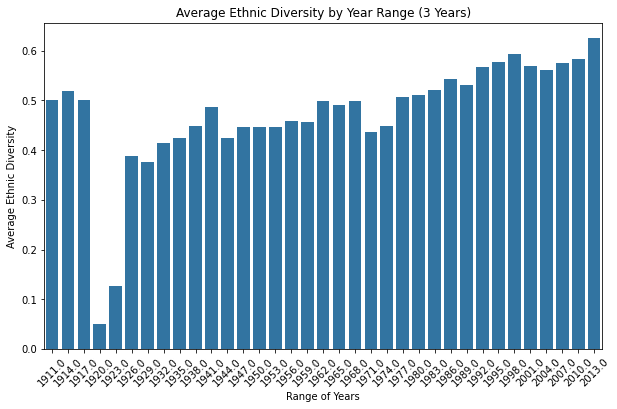

In [102]:
# Calculation of average ethnic diversity per 5-year period
ethnicity_diversity_df['year_bin'] = (ethnicity_diversity_df['movie_release_year'] // 3) * 3

# Calculation of the average of ethnic diversity for each 10-year period
average_ethnic_diversity_by_decade = ethnicity_diversity_df.groupby('year_bin')['ethnicity_diversity'].mean().reset_index()

# Creation of the histogram
plt.figure(figsize=(10, 6))
sns.barplot(data=average_ethnic_diversity_by_decade, x='year_bin', y='ethnicity_diversity')
plt.title('Average Ethnic Diversity by Year Range (3 Years)')
plt.xlabel('Range of Years')
plt.ylabel('Average Ethnic Diversity')
plt.xticks(rotation=45)
plt.show()

We see a slight evolution in the ethnic diversity of movie castings over the years. To better understand this evolution, we will detail the results using the cumulative average of ethnicity per year.

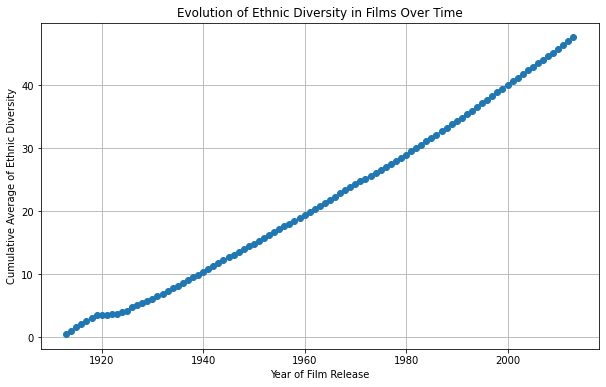

In [103]:
# Supposons que 'ethnicity_diversity_df' soit votre DataFrame
# Calcul de la somme cumulative des moyennes annuelles de diversité ethnique
cumulative_average_ethnic_diversity = ethnicity_diversity_df.groupby('movie_release_year')['ethnicity_diversity'].mean().cumsum()

# Création du graphique
plt.figure(figsize=(10, 6))
cumulative_average_ethnic_diversity.plot(kind='line', marker='o')
plt.title('Evolution of Ethnic Diversity in Films Over Time')
plt.xlabel('Year of Film Release')
plt.ylabel('Cumulative Average of Ethnic Diversity')
plt.grid(True)
plt.show()

It is evident that a real positive evolution of ethnic diversity appears in the field of cinema, meaning that significant changes have occurred over time.

### Impact of Ethnic Diversity
Now, let's undertake an analysis aimed at understanding the influence of ethnic diversity on the performance of movies.

In [104]:
# Remove rows with NaNs in column "movie_box_office_revenue"
ethnicity_diversity_box_office_df = ethnicity_diversity_df.dropna(subset=['movie_box_office_revenue'])

print(ethnicity_diversity_box_office_df.shape)

(4683, 11)


In [105]:
# Remove rows with 0 in column "rating_count"
ethnicity_diversity_rating_df = ethnicity_diversity_df.query('rating_count != 0')

print(ethnicity_diversity_rating_df.shape)

(12191, 11)


#### Impact of Ethnic Diversity on Box Office
Let's conduct an analysis that focuses on measuring a movie's performance using its box office receipts as an indicator.

In [106]:
# Use the 'pearsonr' function to calculate the Pearson correlation
correlation, p_value = pearsonr(ethnicity_diversity_box_office_df['ethnicity_diversity'], ethnicity_diversity_box_office_df['movie_box_office_revenue'])

# Affichez la corrélation de Pearson et la valeur p.
print("Pearson Correlation : {:.3f}".format(correlation))
print("p-value : {:.3f}".format(p_value))

Pearson Correlation : 0.217
p-value : 0.000


We calculated a Pearson correlation of approximately 0.217 between the ethnic diversity of a movie's cast and its box office revenue. This positive correlation, significant since the p-value is less than 0.05, suggests that there is an upward trend in box office revenue when the ethnic diversity of the cast is higher.

In order to more precisely evaluate the relationship between the ethnic diversity of the cast and box office revenues, we will perform a regression analysis. This analysis will allow us to determine the extent of the impact of ethnic diversity on box office revenues and to better understand how ethnic diversity influences the financial performance of movies.

In [107]:
# Preparing data for regression
X = ethnicity_diversity_box_office_df[['ethnicity_diversity']] # Independent variable
y = ethnicity_diversity_box_office_df['movie_box_office_revenue'] # Dependent variable 

# Adding a constant to X
X = sm.add_constant(X)

# Linear regression
model = sm.OLS(y, X).fit()

# Model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     movie_box_office_revenue   R-squared:                       0.047
Model:                                  OLS   Adj. R-squared:                  0.047
Method:                       Least Squares   F-statistic:                     232.3
Date:                      Wed, 20 Dec 2023   Prob (F-statistic):           3.18e-51
Time:                              09:59:08   Log-Likelihood:                -6531.0
No. Observations:                      4683   AIC:                         1.307e+04
Df Residuals:                          4681   BIC:                         1.308e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Our results reveal that there is a statistically significant relationship between the ethnic diversity of a film's cast and box office revenue. However, it is essential to note that the relatively low value of the coefficient of determination (R²) indicates that ethnic diversity, taken alone, only partly explains the variation in box office revenue. This suggests the presence of other factors also influencing the financial performance of films.

However, for a better visualization of the relationship between ethnic diversity and box office revenue, we will create a regression graph.

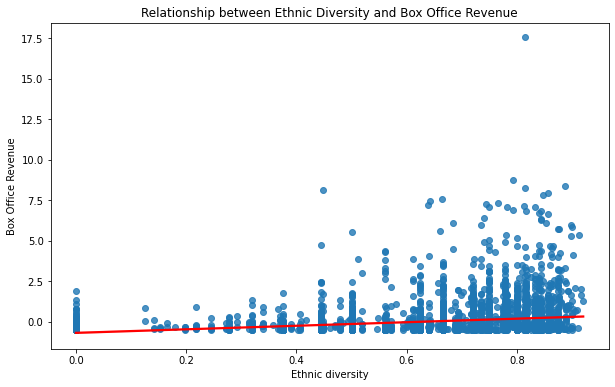

In [108]:
# Plot the regression graph that shows the relationship between ethnic diversity and box office revenue
plt.figure(figsize=(10, 6))
sns.regplot(
    x='ethnicity_diversity',
    y='movie_box_office_revenue',
    data=ethnicity_diversity_box_office_df,
    line_kws={'color': 'red'},
    ci=95
)
plt.title('Relationship between Ethnic Diversity and Box Office Revenue')
plt.xlabel('Ethnic diversity')
plt.ylabel('Box Office Revenue')
plt.show()

The chart provides a visual representation that complements statistical findings that indicate ethnic diversity is a significant predictor of box office revenue. But despite the positive slope of the regression line, we must be careful not to infer causality from this graph alone. The relationship is purely correlational and further analysis would be needed to draw more definitive conclusions about the impact of ethnic diversity on box office performance.

#### Impact of Ethnic Diversity on Average Rating
Let's conduct an analysis that focuses on measuring a movie's performance using its average rating as an indicator.

In [109]:
# Use the 'pearsonr' function to calculate the Pearson correlation
correlation, p_value = pearsonr(ethnicity_diversity_rating_df['ethnicity_diversity'], ethnicity_diversity_rating_df['rating_average'])

# Affichez la corrélation de Pearson et la valeur p.
print("Pearson Correlation : {:.3f}".format(correlation))
print("p-value : {:.3f}".format(p_value))

Pearson Correlation : -0.002
p-value : 0.812


The Pearson correlation between ethnic diversity and average movie rating is -0.002, with a p-value of 0.812. This suggests a very weak and non-significant correlation between ethnic diversity in films and their average rating. The high p-value indicates that the observed relationship could very well be due to chance, and there is no strong statistical evidence of an association between these two variables.

In order to more precisely evaluate the relationship between the ethnic diversity of the cast and average rating, we will perform a regression analysis. This analysis will allow us to determine the extent of the impact of ethnic diversity on it's average rating and to better understand how ethnic diversity influences the financial performance of movies.

In [110]:
# Preparing data for regression
X = ethnicity_diversity_rating_df[['ethnicity_diversity']] # Independent variable
y = ethnicity_diversity_rating_df['rating_average'] # Dependent variable 

# Adding a constant to X
X = sm.add_constant(X)

# Linear regression
model = sm.OLS(y, X).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         rating_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05669
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.812
Time:                        09:59:10   Log-Likelihood:                -18278.
No. Observations:               12191   AIC:                         3.656e+04
Df Residuals:                   12189   BIC:                         3.657e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.0510    

The linear regression analysis aligns with our previous results since the table shows that ethnic diversity has a slightly negative association with the average movie rating, as indicated by the coefficient of -0.0101. However, this relationship is not statistically significant at the 5% level in view of the p-value, which suggests that ethnic diversity does not have a significant impact on the average rating of movies according to this model.

For a better visualization of the relationship between ethnic diversity and average rating, we will create a regression graph.

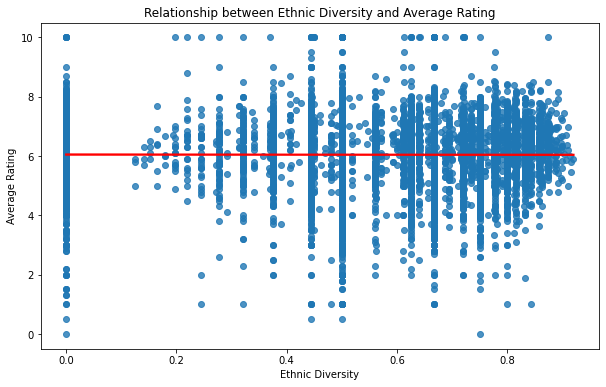

In [111]:
# Plot the regression graph that shows the relationship between ethnic diversity and average rating
plt.figure(figsize=(10, 6))
sns.regplot(
    x='ethnicity_diversity',
    y='rating_average',
    data=ethnicity_diversity_rating_df,
    line_kws={'color': 'red'},
    ci=95
)
plt.title('Relationship between Ethnic Diversity and Average Rating')
plt.xlabel('Ethnic Diversity')
plt.ylabel('Average Rating')
plt.show()

In conclusion, the scatter plot provides visual confirmation that ethnic diversity, as measured and analyzed in this context, has little to no linear relationship with average movie rating. It suggests that while diversity may be an important cultural and social consideration, its direct relationship with how a film is rated on average is not strong based on this data.

## Gender diversity
Let's continue by studying gender diversity within a movie's cast, in order to understand how it can potentially influence that movie's performance.

### Dataframe
Let's download a DataFrame containing information about the movies, including their gender diversity score. We will then use the Pandas library in Python to display the first lines of the DataFrame and better understand its content and format.

In [112]:
# Load Datasets
gender_diversity_df = pd.read_csv("generated/gender_diversity.csv")

# Display gender_diversity_df dataframe
display(gender_diversity_df)

,movie_freebase_id,movie_name,movie_release_year,movie_languages_count,movie_genres,gender_diversity,actors_count,rating_average,rating_count,movie_box_office_revenue
0,/m/0cc8620,Hemingway & Gellhorn,2012.0,22,"['Romance Film', 'Drama']",0.377164,115,6.000,158,NaN
1,/m/04grkmd,Taking Woodstock,2009.0,22,"['Indie', 'Slice of life story', 'Comedy-drama...",0.409565,87,6.211,405,-0.358824
2,/m/02725hs,Captain Corelli's Mandolin,2001.0,35,"['Film adaptation', 'War film', 'Period piece'...",0.371895,81,5.946,488,1.840898
3,/m/02qr3k8,Terror in the Aisles,1984.0,22,"['Thriller', 'Horror', 'Documentary']",0.491782,78,6.100,37,-0.355676
4,/m/01w8g3,Calendar Girls,2003.0,22,"['Ensemble Film', 'Drama', 'Indie', 'Comedy']",0.492654,66,6.593,350,3.292231
...,...,...,...,...,...,...,...,...,...,...
29882,/m/0hzqvb3,Varnam,2010.0,21,['Drama'],0.500000,2,0.000,0,NaN
29883,/m/02pqq45,We're All Christs,2006.0,22,['Drama'],0.000000,2,6.643,42,NaN
29884,/m/09j44z,Rip Girls,2000.0,22,['Family Film'],0.500000,2,6.400,59,NaN
29885,/m/0514m7q,Touch the Sound,2004.0,22,"['Music', 'Instrumental Music', 'Biography', '...",0.500000,2,7.300,11,-0.769968


### Evolution of Gender Diversity
Let's now explore the evolution of gender diversity in film casting across different periods of cinema history. The main objective is, as before, to trace the evolution of the gender distribution in film castings over time.

To do this, as with ethnicity, we will subdivide the history of cinema into 5-year intervals, and examine the gender distribution of actors within each period.

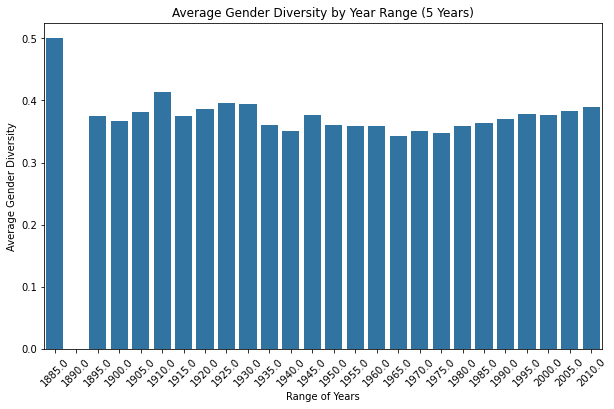

In [113]:
# Calculation of average gender diversity per 5-year period
gender_diversity_df['year_bin'] = (gender_diversity_df['movie_release_year'] // 5) * 5

# Calculation of the average of gender diversity for each 10-year period
average_gender_diversity_by_decade = gender_diversity_df.groupby('year_bin')['gender_diversity'].mean().reset_index()

# Creation of the histogram
plt.figure(figsize=(10, 6))
sns.barplot(data=average_gender_diversity_by_decade, x='year_bin', y='gender_diversity')
plt.title('Average Gender Diversity by Year Range (5 Years)')
plt.xlabel('Range of Years')
plt.ylabel('Average Gender Diversity')
plt.xticks(rotation=45)
plt.show()

We do not see any particular evolution in gender diversity in film castings over the years. To verify this, we will detail the results using the cumulative average of diversity per year.

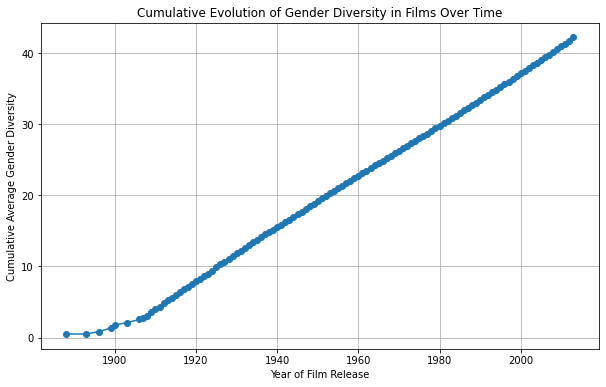

In [114]:
# Calculate the cumulative average of gender diversity per year
cumulative_average_gender_diversity = gender_diversity_df.groupby('movie_release_year')['gender_diversity'].mean().cumsum()

# Create the graph
plt.figure(figsize=(10, 6))
cumulative_average_gender_diversity.plot(kind='line', marker='o')
plt.title('Cumulative Evolution of Gender Diversity in Films Over Time')
plt.xlabel('Year of Film Release')
plt.ylabel('Cumulative Average Gender Diversity')
plt.grid(True)
plt.show()

The chart shows evidence of a positive dynamic change in gender diversity within the film industry over the years.

### Impact of Gender Diversity
Now, let's undertake an analysis aimed at understanding the influence of gender diversity on the performance of movies.

In [115]:
# Remove rows with NaNs in column "movie_box_office_revenue"
gender_diversity_box_office_df = gender_diversity_df.dropna(subset=['movie_box_office_revenue'])

print(gender_diversity_box_office_df.shape)

(5600, 11)


In [116]:
# Remove rows with 0 in column "rating_count"
gender_diversity_rating_df = gender_diversity_df.query('rating_count != 0')

print(gender_diversity_rating_df.shape)

(27798, 11)


#### Impact of Gender Diversity on Box Office
Let's conduct an analysis that focuses on measuring a movie's performance using its box office receipts as an indicator.

In [117]:
# Use the 'pearsonr' function to calculate the Pearson correlation
correlation, p_value = pearsonr(gender_diversity_box_office_df['gender_diversity'], gender_diversity_box_office_df['movie_box_office_revenue'])

# Affichez la corrélation de Pearson et la valeur p.
print("Pearson Correlation : {:.3f}".format(correlation))
print("p-value : {:.3f}".format(p_value))

Pearson Correlation : -0.000
p-value : 0.978


We calculated a correlation of less than -0.000 between the gender diversity within a film's cast and its box office receipts. This correlation indicates an negligible and close to zero relationship between these two variables. In practice, this suggests that there is virtually no linear correlation between gender diversity within a cast and the movie's box office revenue.

To further evaluate the relationship between casting gender diversity and box office revenue, we will perform a regression analysis. This analysis will make it possible to determine the extent of the impact of ethnic diversity on box office revenues and to verify whether, in reality, gender diversity influences the financial performance of movies.

In [118]:
# Preparing data for regression
X = gender_diversity_box_office_df[['gender_diversity']] # Independent variable
y = gender_diversity_box_office_df['movie_box_office_revenue'] # Dependent variable 

# Adding a constant to X
X = sm.add_constant(X)

# Linear regression
model = sm.OLS(y, X).fit()

# Model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     movie_box_office_revenue   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.000
Method:                       Least Squares   F-statistic:                 0.0007479
Date:                      Wed, 20 Dec 2023   Prob (F-statistic):              0.978
Time:                              09:59:13   Log-Likelihood:                -7945.6
No. Observations:                      5600   AIC:                         1.590e+04
Df Residuals:                          5598   BIC:                         1.591e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In summary, the regression analysis indicates that gender_diversity is not a significant predictor of movie_box_office_revenue and that the overall model does not fit the data well. Therefore, it is likely that other variables not included in the model are more predictive of box office revenue, such as ethnic diversity, as discussed previously.

Let's plot a regression graph to visualize the relationship between gender diversity and movie box office revenue

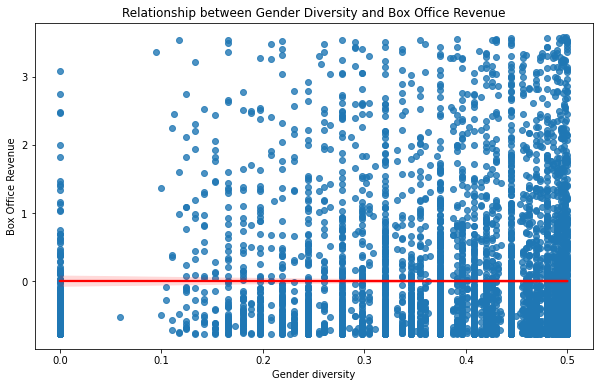

In [119]:
# Plot the regression graph that shows the relationship between gender diversity and box office revenue
plt.figure(figsize=(10, 6))
sns.regplot(
    x='gender_diversity',
    y='movie_box_office_revenue',
    data=gender_diversity_box_office_df,
    line_kws={'color': 'red'},
    ci=95
)
plt.title('Relationship between Gender Diversity and Box Office Revenue')
plt.xlabel('Gender diversity')
plt.ylabel('Box Office Revenue')
plt.show()

In conclusion, the visual representation on the scatter plot supports the statistical findings from the regression analysis : gender diversity within the cast has no significant linear correlation with the box office revenue of the movies in this dataset.

#### Impact of Gender Diversity on Average Rating
Let's conduct an analysis that focuses on measuring a movie's performance using its average rating as an indicator.

In [120]:
# Use the 'pearsonr' function to calculate the Pearson correlation
correlation, p_value = pearsonr(gender_diversity_rating_df['gender_diversity'], gender_diversity_rating_df['rating_average'])

# Affichez la corrélation de Pearson et la valeur p.
print("Pearson Correlation : {:.3f}".format(correlation))
print("p-value : {:.3f}".format(p_value))

Pearson Correlation : -0.018
p-value : 0.003


The Pearson correlation coefficient of -0.018 indicates a very weak negative correlation between gender diversity in a movie and his average rate. The p-value of 0.003 suggests that this correlation is statistically significant, despite being weak, meaning that there is a small but significant association where movies with higher gender diversity might be associated with slightly lower rating averages.

Let's perform a regression analysis to assess the relationship between gender diversity and average rate, to check this.

In [121]:
# Preparing data for regression
X = gender_diversity_df[['gender_diversity']] # Independent variable
y = gender_diversity_df['rating_average'] # Dependent variable 

# Adding a constant to X
X = sm.add_constant(X)

# Linear regression
model = sm.OLS(y, X).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         rating_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8371
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.360
Time:                        09:59:15   Log-Likelihood:                -61362.
No. Observations:               29887   AIC:                         1.227e+05
Df Residuals:                   29885   BIC:                         1.227e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.5410      0.028  

The linear regression shown in the image indicates a correlation coefficient of -0.0651 for genre diversity, suggesting a weak, even negligible, negative correlation with the average movie rating. However, with a p-value of 0.360, this correlation is not statistically significant, implying that gender diversity, according to this model, does not appear to have a clear impact on the average film rating.

Let's visualize this with a regression graph.

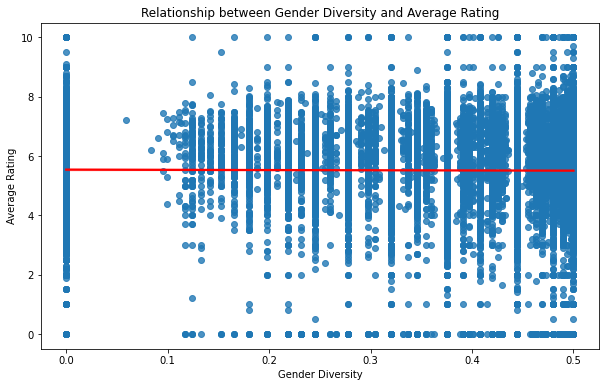

In [122]:
# Plot the regression graph that shows the relationship between gender diversity and average rating
plt.figure(figsize=(10, 6))
sns.regplot(
    x='gender_diversity',
    y='rating_average',
    data=gender_diversity_df,
    line_kws={'color': 'red'},
    ci=95
)
plt.title('Relationship between Gender Diversity and Average Rating')
plt.xlabel('Gender Diversity')
plt.ylabel('Average Rating')
plt.show()

In conclusion, the visual representation reinforces the statistical analysis that gender diversity, as quantified in this dataset, does not have a significant impact on the average rate of movies. The scatter plot shows a wide distribution of ratings across the levels of gender diversity without a clear pattern or trend, indicating that other factors are likely to be more influential on the average rate than gender diversity.